In [1]:
import torch as th
import numpy as np

In [2]:
tensor_a = th.tensor([1,2,3,4])
tensor_b = th.tensor([5,6,7,8])

In [3]:
print(tensor_a + tensor_b)
print(tensor_a.add(tensor_b))
print(th.add(tensor_a, tensor_b))

tensor([ 6,  8, 10, 12])
tensor([ 6,  8, 10, 12])
tensor([ 6,  8, 10, 12])


In [4]:
tensor_b - tensor_a

tensor([4, 4, 4, 4])

In [5]:
tensor_a * tensor_b

tensor([ 5, 12, 21, 32])

In [6]:
tensor_b / tensor_a

tensor([5.0000, 3.0000, 2.3333, 2.0000])

In [7]:
tensor_b % tensor_a

tensor([0, 0, 1, 0])

In [8]:
th.pow(tensor_a, tensor_b)

tensor([    1,    64,  2187, 65536])

In [9]:
tensor_a.add(tensor_b)

tensor([ 6,  8, 10, 12])

In [10]:
tensor_a

tensor([1, 2, 3, 4])

In [11]:
tensor_a.add_(tensor_b)

tensor([ 6,  8, 10, 12])

In [12]:
tensor_a

tensor([ 6,  8, 10, 12])

# Create a Simple Neural Network

In [10]:
import torch as th
import torch.nn as nn
import torch.nn.functional as F

In [11]:
# Create a model class that inherits nn.Module
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.fc1 = nn.Linear(in_features, 16)
        self.fc2 = nn.Linear(16,8)
        self.out = nn.Linear(8,out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        
        return x

In [12]:
# pick a manual seed for randomization
th.manual_seed(42)
model = Model(4, 3)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
path = r"C:/Users/Lenovo\Downloads/ML datasets/iris.csv"
df = pd.read_csv(path)
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
df.variety = df['variety'].replace('Setosa', 0)
df.variety = df['variety'].replace('Versicolor', 1)
df.variety = df['variety'].replace('Virginica', 2)
df.tail()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16700\1879522224.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.variety = df['variety'].replace('Virginica', 2)


,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [6]:
X = df.drop('variety', axis='columns')
y = df.variety

In [7]:
# convert numpy arrays 
X = X.values
y = y.values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
X_train = th.FloatTensor(X_train)
X_test = th.FloatTensor(X_test)

In [18]:
y_train = th.LongTensor(y_train)
y_test = th.LongTensor(y_test)

In [26]:
criterian = nn.CrossEntropyLoss()
optimizer = th.optim.Adam(model.parameters(), lr= 0.01)

In [ ]:
epochs = 200
losses = []

for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterian(y_pred, y_train)
    losses.append(loss.detach().numpy())
    
    if i%10 == 0:
        print(f'Epoch: {i} loss: {loss}')
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 loss: 0.028379453346133232
Epoch: 10 loss: 0.02846088819205761
Epoch: 20 loss: 0.02832654118537903
Epoch: 30 loss: 0.02818075753748417
Epoch: 40 loss: 0.02805456332862377
Epoch: 50 loss: 0.027940578758716583
Epoch: 60 loss: 0.0278313048183918
Epoch: 70 loss: 0.027723221108317375
Epoch: 80 loss: 0.02761092036962509
Epoch: 90 loss: 0.02749665454030037
Epoch: 100 loss: 0.02738056890666485
Epoch: 110 loss: 0.027262968942523003
Epoch: 120 loss: 0.02714393474161625
Epoch: 130 loss: 0.0270237997174263
Epoch: 140 loss: 0.026903247460722923
Epoch: 150 loss: 0.02678174525499344
Epoch: 160 loss: 0.026659615337848663
Epoch: 170 loss: 0.026537476107478142
Epoch: 180 loss: 0.026414912194013596
Epoch: 190 loss: 0.026292113587260246


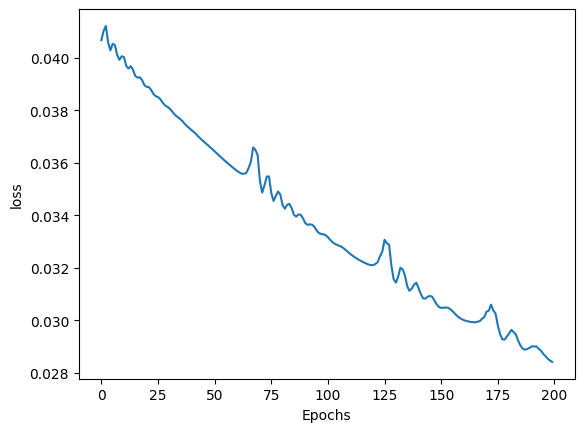

In [25]:
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()